In [1]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/CovidDataset.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("Completed")

FileNotFoundError: ignored

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from keras.layers import *
from keras.models import * 
import keras as tf

In [4]:
#Training model
model = Sequential()   ## creating a blank model
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))    ### reduce the overfitting
 
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())    ### input layer
model.add(Dense(64,activation='relu'))    ## hidden layer of ann
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))   ## output layer
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [5]:
#Moulding train images (Generating more samples)(Increasing dataset)
from tensorflow.keras.preprocessing import image
train_datagen = image.ImageDataGenerator(rescale = 1./255, 
                                         shear_range = 0.2,
                                         zoom_range = 0.2, 
                                         horizontal_flip = True)
test_dataset = image.ImageDataGenerator(rescale=1./255)

In [6]:
#Reshaping test and validation images 
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/CovidDataset/CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')
validation_generator = test_dataset.flow_from_directory(
    '/content/drive/MyDrive/CovidDataset/CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [7]:
#### Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=7,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps=2
)

Epoch 1/50
7/7 [==============================] - 66s 7s/step - loss: 0.7413 - accuracy: 0.5893 - val_loss: 0.6909 - val_accuracy: 0.5000
Epoch 2/50
7/7 [==============================] - 9s 1s/step - loss: 0.6651 - accuracy: 0.6071 - val_loss: 0.6604 - val_accuracy: 0.5000
Epoch 3/50
7/7 [==============================] - 9s 1s/step - loss: 0.6193 - accuracy: 0.6696 - val_loss: 0.5715 - val_accuracy: 0.8000
Epoch 4/50
7/7 [==============================] - 9s 1s/step - loss: 0.4355 - accuracy: 0.8259 - val_loss: 0.2874 - val_accuracy: 0.9667
Epoch 5/50
7/7 [==============================] - 9s 1s/step - loss: 0.2719 - accuracy: 0.8750 - val_loss: 0.2664 - val_accuracy: 0.9667
Epoch 6/50
7/7 [==============================] - 9s 1s/step - loss: 0.2876 - accuracy: 0.9107 - val_loss: 0.1852 - val_accuracy: 0.9333
Epoch 7/50
7/7 [==============================] - 9s 1s/step - loss: 0.1840 - accuracy: 0.9375 - val_loss: 0.0482 - val_accuracy: 1.0000
Epoch 8/50
7/7 [========================

In [8]:
### Save a model
model.save('covid.h5')

In [9]:
### Load the model
mymodel = tf.models.load_model("/content/covid.h5")

In [10]:
import cv2


In [15]:
pred = mymodel.predict(np.array([img]))
if pred[0][0] == 0:
  print("Covid Positive")
else:
  print("Covid Negative")

Covid Negative


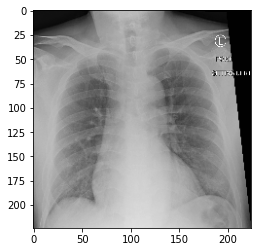

In [12]:
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("/content/drive/MyDrive/CovidDataset/CovidDataset/Val/Covid/16654_1_1.png")
img = cv2.resize(img,(224,224))
plt.imshow(img);

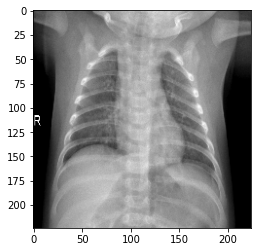

In [14]:
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("/content/drive/MyDrive/CovidDataset/CovidDataset/Val/Normal/NORMAL2-IM-0535-0001-0002.jpeg")
img = cv2.resize(img,(224,224))
plt.imshow(img);